# Project : Galway Windspeed Analysis 


Import Python Libraries  

In [35]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk

Data collection    

Source : [Met Éireann  ](https://www.met.ie/climate/available-data/historical-data) - The Irish Meteorological Service  

In [36]:
# The dataset  was downloaded  from Met Éireann then named and saved in this repository
filename= "macehead_wind_data.csv"
directory="data/"
file_path = directory + filename

macehead_df = pd.read_csv(file_path, skiprows=17)
# show
macehead_df



C:\Users\marou\AppData\Local\Temp\ipykernel_25704\1697424725.py:6: DtypeWarning: Columns (2,4,6,7,8,9,10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  macehead_df = pd.read_csv(file_path, skiprows=17)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,13-aug-2003 01:00,-1,,4,,4,,,,,,7,,7,
1,13-aug-2003 02:00,-1,,4,,4,,,,,,7,,7,
2,13-aug-2003 03:00,-1,,4,,4,,,,,,7,,7,
3,13-aug-2003 04:00,-1,,4,,4,,,,,,7,,7,
4,13-aug-2003 05:00,-1,,4,,4,,,,,,7,,7,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195499,30-nov-2025 20:00,0,0.8,0,10.6,0,10.5,10.3,12.5,97,996.3,2,14,2,240
195500,30-nov-2025 21:00,0,1.4,0,10.0,0,9.8,9.6,12.0,97,995.8,2,10,2,240
195501,30-nov-2025 22:00,0,0.4,0,10.0,0,9.9,9.7,12.0,97,995.2,2,10,2,240
195502,30-nov-2025 23:00,0,0.2,0,10.8,0,10.6,10.4,12.6,97,994.4,2,12,2,240


In [37]:
# read the first 14 rows to extract metadata and column descriptions, the rows include station info, location, and what each column represents
col_description = pd.read_csv(file_path, nrows=14, header=None, sep=";")  
col_description

,0
0,Station Name: MACE HEAD
1,Station Height: 21 M
2,"Latitude:53.326 ,Longitude: -9.901"
3,date: - Date and Time (utc)
4,rain: - Precipitation Amount (mm)\t
5,temp: - Air Temperature (C)\t
6,wetb: - Wet Bulb Temperature (C)
7,dewpt: - Dew Point Temperature (C)
8,vappr: - Vapour Pressure (hPa)\t\t ...
9,rhum: - Relative Humidity (%)


In [38]:
# convert date Dtype into datetime
macehead_df['date'] = pd.to_datetime(macehead_df['date'])


C:\Users\marou\AppData\Local\Temp\ipykernel_25704\1943070312.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  macehead_df['date'] = pd.to_datetime(macehead_df['date'])


In [39]:
# dataset info
macehead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195504 entries, 0 to 195503
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    195504 non-null  datetime64[ns]
 1   ind     195504 non-null  int64         
 2   rain    195504 non-null  object        
 3   ind.1   195504 non-null  int64         
 4   temp    195504 non-null  object        
 5   ind.2   195504 non-null  int64         
 6   wetb    195504 non-null  object        
 7   dewpt   195504 non-null  object        
 8   vappr   195504 non-null  object        
 9   rhum    195504 non-null  object        
 10  msl     195504 non-null  object        
 11  ind.3   195504 non-null  int64         
 12  wdsp    195504 non-null  object        
 13  ind.4   195504 non-null  int64         
 14  wddir   195504 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 22.4+ MB


In [40]:
# drop/remove columns that are not relevant to this analysis and store them into drop_col_list variable. 
drop_col_list = [ 'ind', 'rain', 'ind.1' , 'temp' , 'ind.2', 'wetb', 'dewpt', 'vappr' , 'rhum' , 'msl' , 'ind.3' , 'ind.4' , 'wddir']
macehead_df.drop(columns=drop_col_list, inplace=True)

# show the new dataframe with relevant columns
macehead_df.head((30))

,date,wdsp
0,2003-08-13 01:00:00,
1,2003-08-13 02:00:00,
2,2003-08-13 03:00:00,
3,2003-08-13 04:00:00,
4,2003-08-13 05:00:00,
5,2003-08-13 06:00:00,
6,2003-08-13 07:00:00,
7,2003-08-13 08:00:00,
8,2003-08-13 09:00:00,
9,2003-08-13 10:00:00,


In [41]:
# save the the cleaned Wind Speed dataframe to a new CSV file, this new file can be used for comparison with the original messy dataset (multi indexes,unrelated columns)
macehead_df.to_csv('data/clean_macehead_windspeed.csv', index=True)

In [42]:
# reindexing : set the index of the dataframe to be a date
macehead_df.set_index('date',inplace=True)
# show

# add df index as a column
macehead_df['date'] = macehead_df.index
macehead_df['date']



date
2003-08-13 01:00:00   2003-08-13 01:00:00
2003-08-13 02:00:00   2003-08-13 02:00:00
2003-08-13 03:00:00   2003-08-13 03:00:00
2003-08-13 04:00:00   2003-08-13 04:00:00
2003-08-13 05:00:00   2003-08-13 05:00:00
                              ...        
2025-11-30 20:00:00   2025-11-30 20:00:00
2025-11-30 21:00:00   2025-11-30 21:00:00
2025-11-30 22:00:00   2025-11-30 22:00:00
2025-11-30 23:00:00   2025-11-30 23:00:00
2025-12-01 00:00:00   2025-12-01 00:00:00
Name: date, Length: 195504, dtype: datetime64[ns]

In [43]:
# checking for missing values from the entire df, the output doesnt retun any because the original missing values were filled with space. 
print(macehead_df.isna().sum())


wdsp    0
date    0
dtype: int64


In [44]:
# this method only replaces the cells with values that are exactly one space charcter.  SO this method catches only very simple missing values.
macehead_df.replace(' ', np.nan, inplace=True)

In [45]:
# check the rows with NaN values, to confirm if the space was indeed replaced by NaN values.
macehead_df.head(1400)[macehead_df.head(1400).isna().any(axis=1)]

# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe

,wdsp,date
date,,
2003-08-13 01:00:00,NaN,2003-08-13 01:00:00
2003-08-13 02:00:00,NaN,2003-08-13 02:00:00
2003-08-13 03:00:00,NaN,2003-08-13 03:00:00
2003-08-13 04:00:00,NaN,2003-08-13 04:00:00
2003-08-13 05:00:00,NaN,2003-08-13 05:00:00
...,...,...
2003-10-06 11:00:00,NaN,2003-10-06 11:00:00
2003-10-06 12:00:00,NaN,2003-10-06 12:00:00
2003-10-06 13:00:00,NaN,2003-10-06 13:00:00


In [46]:
# check missing values
print(macehead_df.isna().sum())


wdsp    1296
date       0
dtype: int64


In [47]:
# remove missing values
macehead_df.dropna(inplace=True)

In [48]:
# change windspeed Dtype into float instead of object
macehead_df['wdsp'] = macehead_df['wdsp'].astype('float64') 

# Plot windspeed overtime

### Mace Head station - Howerly Windspeed overtime 2003-2025


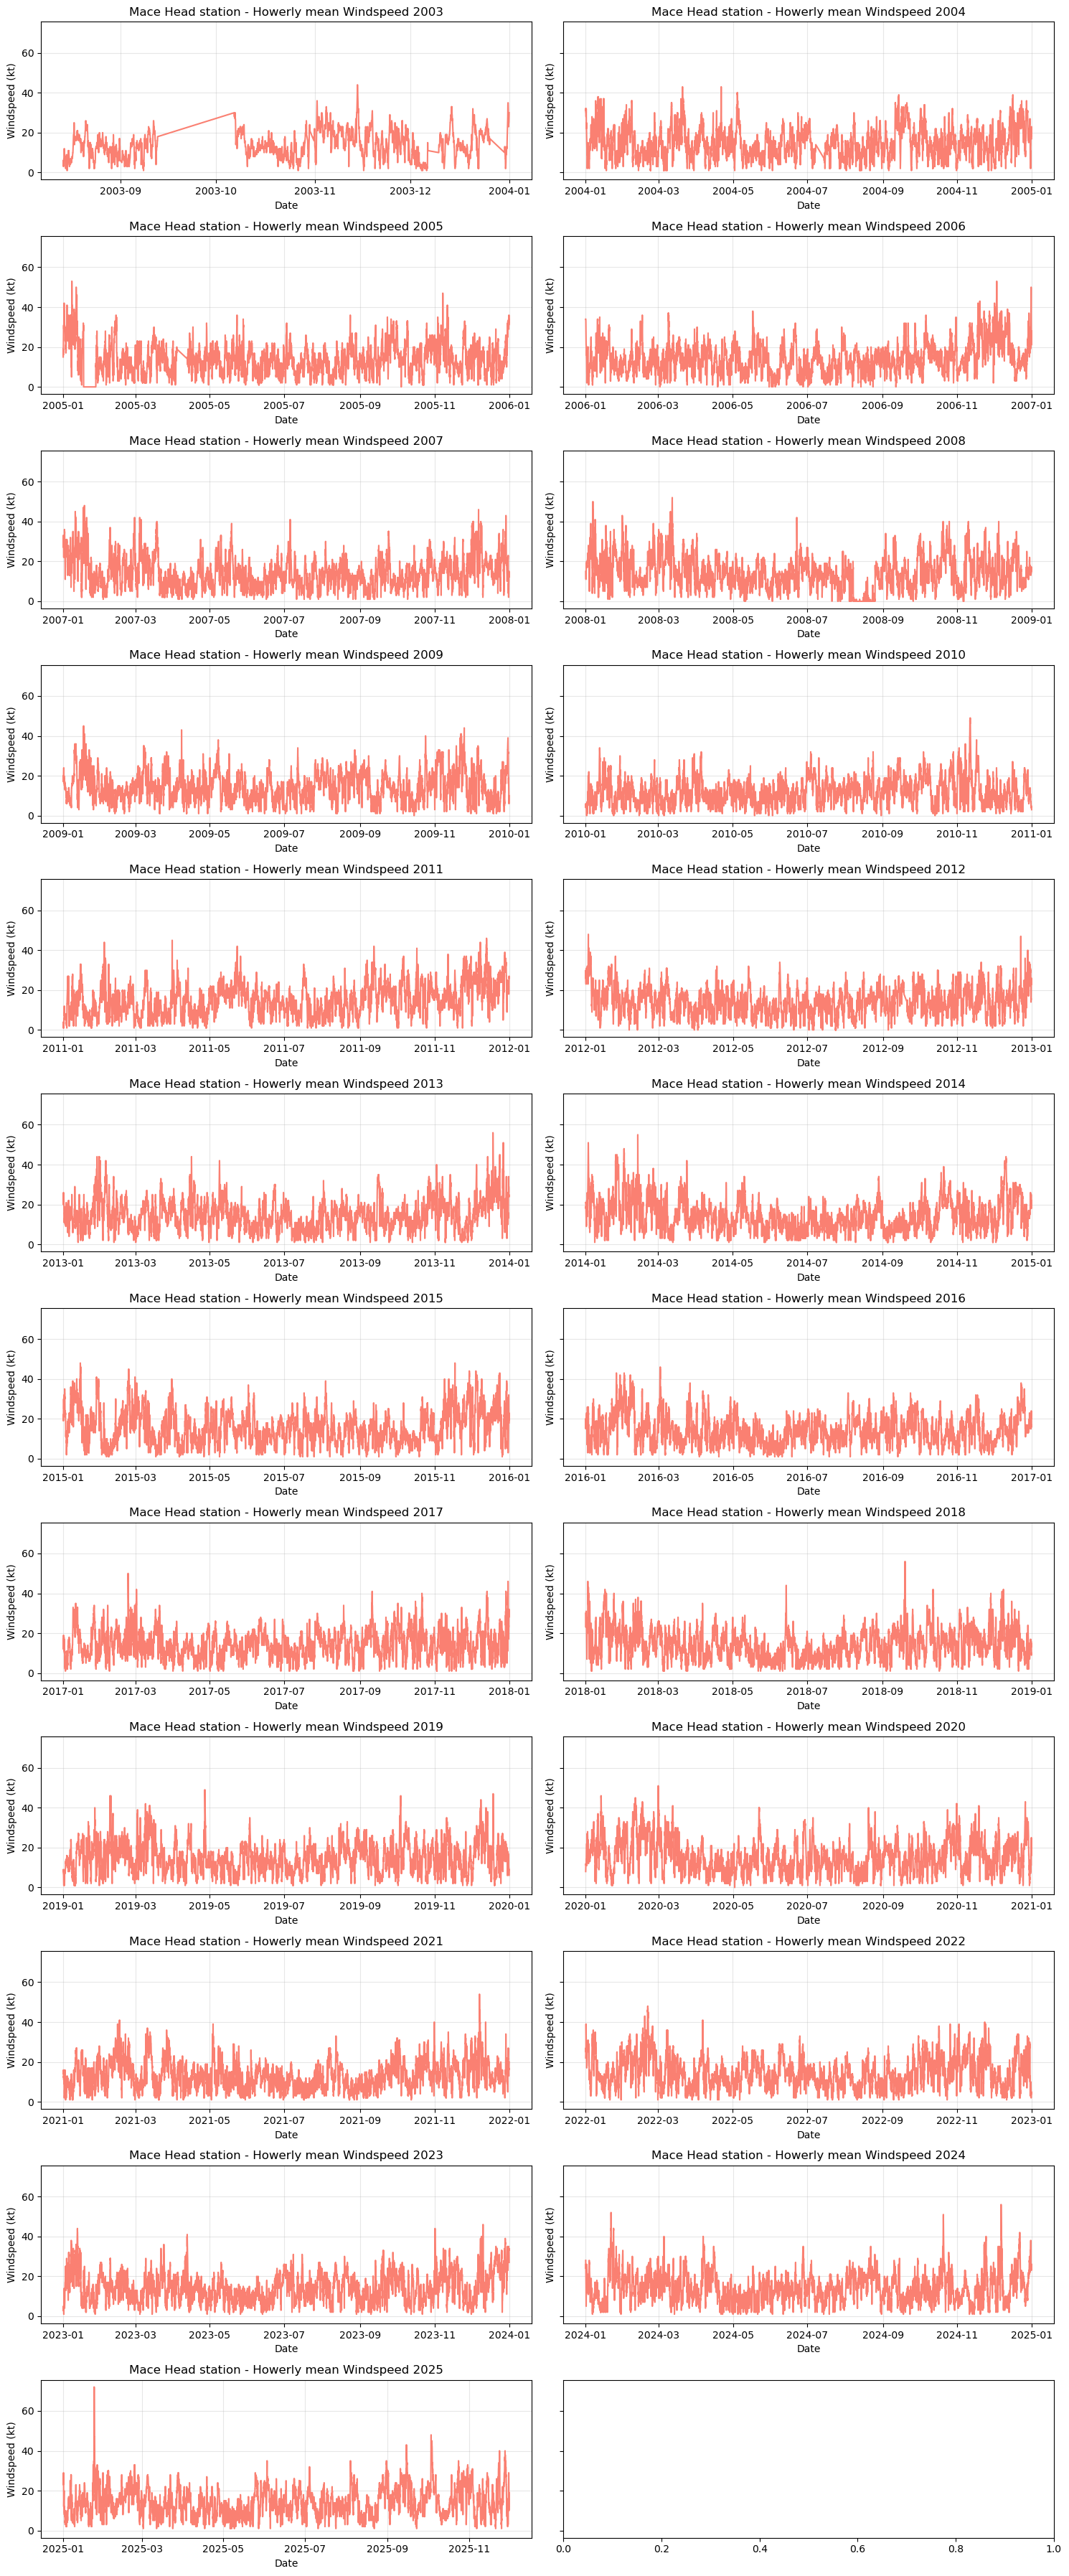

In [49]:
# add a new column for 'Years'
macehead_df["year"] = macehead_df["date"].dt.year
# select the year column from the data frame, then returns all the values in that column
years = macehead_df["year"].unique()
years.sort()
# number of rows needed to fit n plots into cols columns
n = len(years)
cols = 2
rows = (n + cols - 1) // cols


cmap = plt.cm.viridis
norm = plt.Normalize(min(years), max(years))

# define grid size (2 columns)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*3), sharey=True)
axes = axes.flatten()  # flatten for easy indexing

# plot each year
for i, year in enumerate(years):
    data_year = macehead_df[macehead_df.index.year == year]
    axes[i].plot(data_year.index, data_year['wdsp'], color='salmon')
    axes[i].set_title(f'Mace Head station - Howerly mean Windspeed {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Windspeed (kt)')
    axes[i].grid(True, alpha=0.3)


# show
plt.tight_layout()
plt.show()




# method used : 
# also, this solution was generated by AI (chat GPT) in response to the prompt : 

### Hourly mean Windspeed overtime : 2003-2025  
Mace Head station 

Hourly mean wind speeds show how wind changes during the day.  


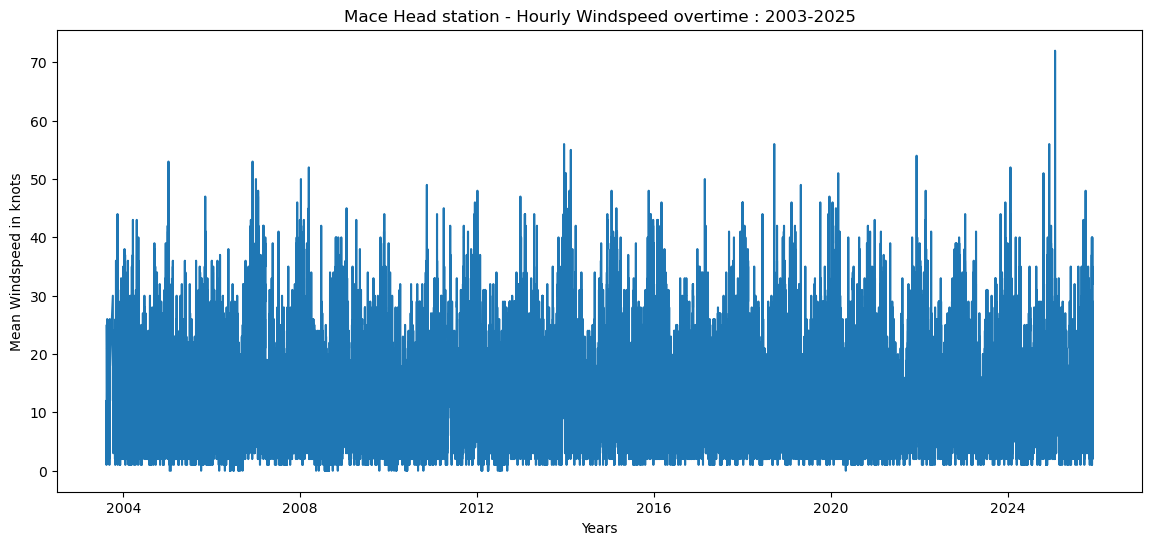

In [50]:
# plot windspeed overtime
plt.figure(figsize=(14,6))
sns.lineplot(data=macehead_df, x='date', y='wdsp')
plt.xlabel('Years')
plt.ylabel('Mean Windspeed in knots')
plt.title('Mace Head station - Hourly Windspeed overtime : 2003-2025')
plt.show()


### 24H rolling windspeed over the years 2003-2025   
Mace Head station 

In [51]:
# add a new column that stores the 24H wind speed 
# this solution was generated by AI (chat GPT) in response to the prompt : " How to calculate a windspeed for rolling 24H using Pandas"
macehead_df['rolling_24_windspeed'] = macehead_df['wdsp'].rolling(window=24).mean()

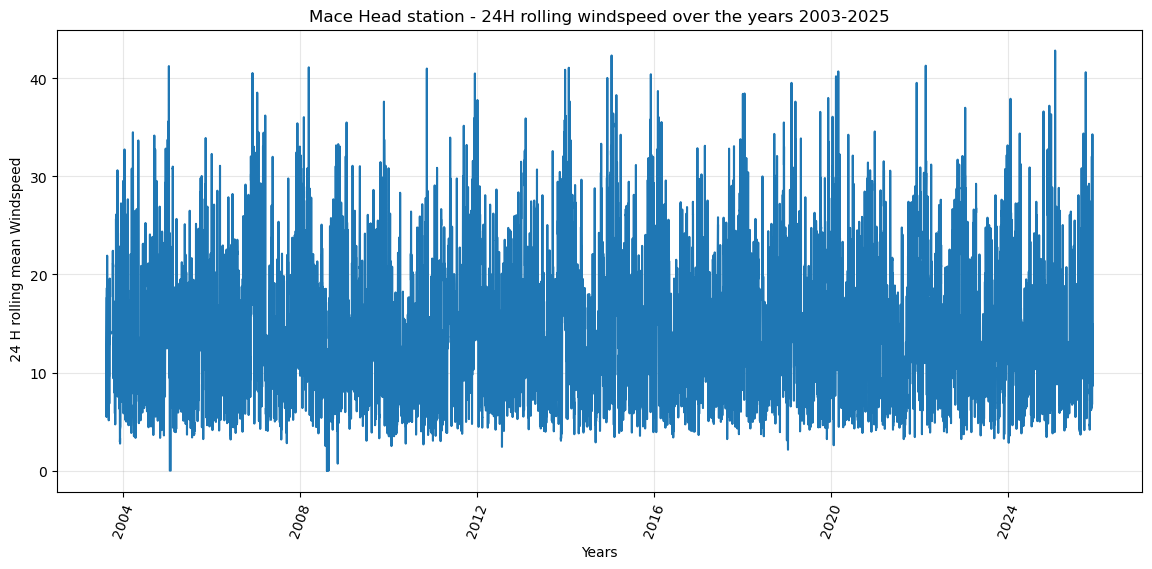

In [52]:
# plot
plt.figure(figsize=(14,6))
sns.lineplot(data=macehead_df, x='date', y='rolling_24_windspeed')
plt.xlabel('Years')
plt.xticks(rotation=70)
plt.ylabel(' 24 H rolling mean Windspeed')
plt.title('Mace Head station - 24H rolling windspeed over the years 2003-2025')
plt.grid(True, alpha=0.3)
plt.show()


###  Daily mean windspeed over the years 2003-2025  
Mace Head station 

Daily mean wind speeds capture short-term variability and periods of stronger winds influenced by weather.  

In [53]:
# resample hourly windspeed to daily mean temeprature. Each row now represents a calendar day 24H with its mean windspeed 
d_mean_windspeed = macehead_df['wdsp'].resample("D").mean()
# show daily mean temperature. I can see the result is a series indexed by dates.  
d_mean_windspeed

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

date
2003-08-14     6.608696
2003-08-15     6.750000
2003-08-16     5.625000
2003-08-17    16.666667
2003-08-18    18.500000
                ...    
2025-11-27    29.000000
2025-11-28    30.500000
2025-11-29    10.666667
2025-11-30    14.625000
2025-12-01    19.000000
Freq: D, Name: wdsp, Length: 8146, dtype: float64

In [54]:
# seaborn plots columns not index values. Index resetting tursn index into a normal column for plotting. 
daily_df = d_mean_windspeed.reset_index()
daily_df.columns = ['date', 'temp_daily_mean']
# show updated df 
daily_df

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

,date,temp_daily_mean
0,2003-08-14,6.608696
1,2003-08-15,6.750000
2,2003-08-16,5.625000
3,2003-08-17,16.666667
4,2003-08-18,18.500000
...,...,...
8141,2025-11-27,29.000000
8142,2025-11-28,30.500000
8143,2025-11-29,10.666667
8144,2025-11-30,14.625000


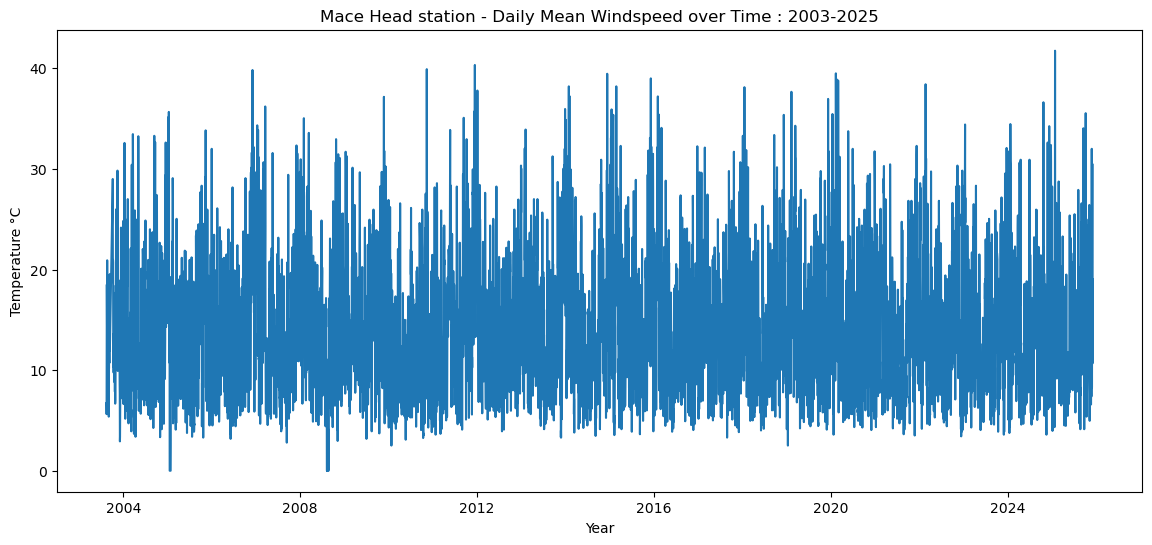

In [55]:
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_df, x='date', y='temp_daily_mean')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.title('Mace Head station - Daily Mean Windspeed over Time : 2003-2025')
plt.show()

### Monthly mean windspeed over the years 2003-2025  
Mace Head station

Monthly aggregation is used to identify seasonal patterns in wind behaviour.  

In [56]:
# resample hourly windspeed to monthly mean windspeed. Each row now represents a month with its mean windspeed 
m_mean_windspeed = macehead_df['wdsp'].resample("ME").mean()

# show monthly mean windspeed. I can see the result is a series indexed by dates.  
m_mean_windspeed

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

date
2003-08-31    11.921114
2003-09-30    11.996310
2003-10-31    12.509632
2003-11-30    17.662500
2003-12-31    13.397482
                ...    
2025-08-31    13.763441
2025-09-30    17.184722
2025-10-31    17.491935
2025-11-30    15.705556
2025-12-31    19.000000
Freq: ME, Name: wdsp, Length: 269, dtype: float64

In [57]:
# to plot with Seaborn, the dates must be regular columns not index values. The reset index is here used to convert the index into a normal column for sns plotting purposes. 
monthly_df = m_mean_windspeed.reset_index()
monthly_df.columns = ['date', 'windspeed_monthly_mean']

# show updated df 
monthly_df

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.htmlf

,date,windspeed_monthly_mean
0,2003-08-31,11.921114
1,2003-09-30,11.996310
2,2003-10-31,12.509632
3,2003-11-30,17.662500
4,2003-12-31,13.397482
...,...,...
264,2025-08-31,13.763441
265,2025-09-30,17.184722
266,2025-10-31,17.491935
267,2025-11-30,15.705556


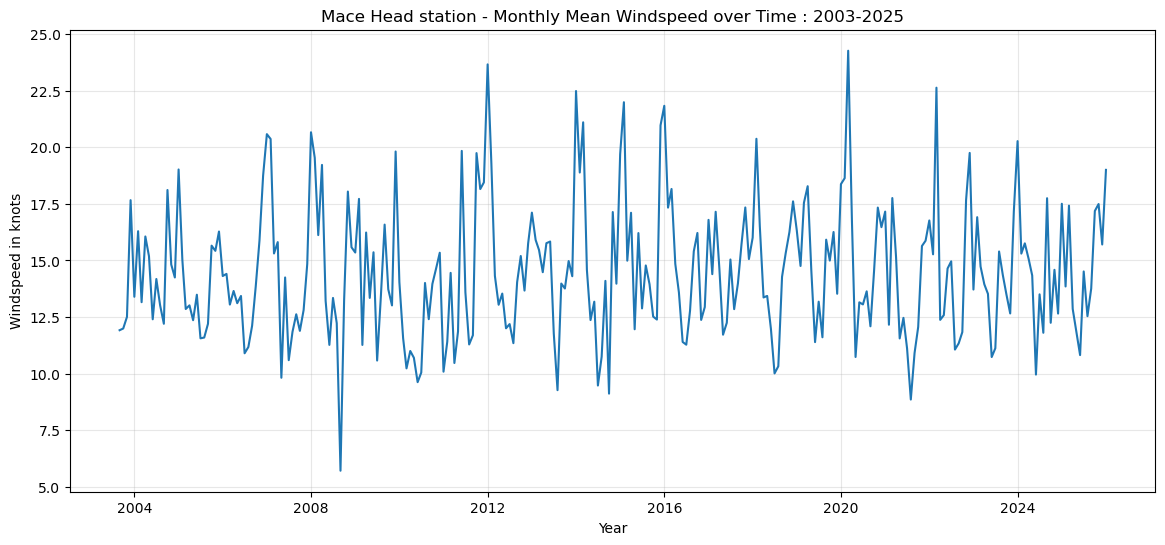

In [58]:
plt.figure(figsize=(14,6))
sns.lineplot(data= monthly_df, x='date', y='windspeed_monthly_mean')
plt.xlabel('Year')
plt.ylabel('Windspeed in knots')
plt.title('Mace Head station - Monthly Mean Windspeed over Time : 2003-2025')
plt.grid(True, alpha=0.3)
plt.show()


### Seasonal Windspeed analysis

A seasonal variable was created by mapping calendar months to meteorological seasons. This allows wind speed patterns to be analysed at a climatic scale rather than at individual time intervals.  

In this step I am grouping months into seasons so I can compare wind behaviour in: Winter Spring Summer Autumn.  
This moves the analysis from calendar time into [climate structure](https://www.ncei.noaa.gov/news/meteorological-versus-astronomical-seasons#:~:text=You%20may%20have%20noticed%20that,dates%20in%20the%20Southern%20Hemisphere)

In [59]:
# ensure datetime
macehead_df.index = pd.to_datetime(macehead_df.index)

# extract month
macehead_df["month"] = macehead_df.index.month

# map months to seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

macehead_df["season"] = macehead_df["month"].apply(assign_season)

# show months matching seasons 
macehead_df[["month", "season"]].head(1995)

,month,season
date,,
2003-08-14 01:00:00,8,Summer
2003-08-14 02:00:00,8,Summer
2003-08-14 03:00:00,8,Summer
2003-08-14 04:00:00,8,Summer
2003-08-14 05:00:00,8,Summer
...,...,...
2003-11-30 21:00:00,11,Autumn
2003-11-30 22:00:00,11,Autumn
2003-11-30 23:00:00,11,Autumn


In [60]:
# group df by season column 
seasonal_mean = macehead_df.groupby("season")["wdsp"].mean().reindex(["Winter","Spring","Summer","Autumn"])
seasonal_mean

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

season
Winter    16.710913
Spring    13.479687
Summer    12.511936
Autumn    15.260713
Name: wdsp, dtype: float64

C:\Users\marou\AppData\Local\Temp\ipykernel_25704\3947580147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_mean.index, y=seasonal_mean.values, palette="dark")


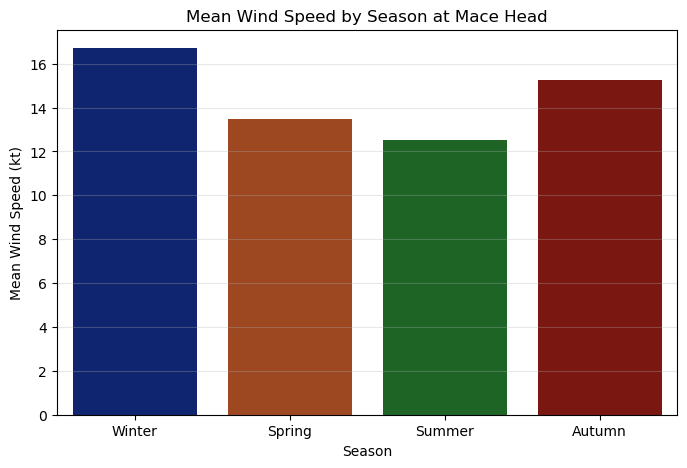

In [61]:
# Barplot

plt.figure(figsize=(8,5))
sns.barplot(x=seasonal_mean.index, y=seasonal_mean.values, palette="dark")
plt.ylabel("Mean Wind Speed (kt)")
plt.xlabel("Season")
plt.title("Mean Wind Speed by Season at Mace Head")
plt.grid(axis='y', alpha=0.3)
plt.show()

-----------------

Winter and Autumn show higher mean wind speeds, while summer exhibits lower values, providing insight into the seasonal variability of wind at Mace Head.  

----------------

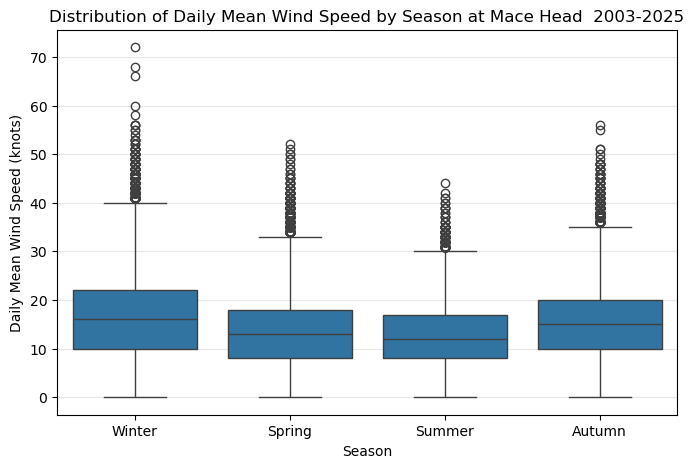

In [62]:
# Boxplot

plt.figure(figsize=(8,5))
sns.boxplot(
    data=macehead_df,
    x='season',
    y='wdsp',
    order=['Winter', 'Spring', 'Summer', 'Autumn']
)

plt.xlabel('Season')
plt.ylabel('Daily Mean Wind Speed (knots)')
plt.title('Distribution of Daily Mean Wind Speed by Season at Mace Head  2003-2025')
plt.grid(axis='y', alpha=0.3)
plt.show()

-----------------

The boxplot shows clear seasonal variation in daily mean wind speeds at Mace Head.  
Winter exhibits the highest median wind speeds and the widest spread, indicating more variable winds.  
Summer has the lowest median and a narrower interquartile range, suggesting more stable winds.  

----------------

### Wind Turbine Operating Conditions 


#### Classify Wind Speeds According to Turbine Thresholds

Wind speeds were classified according to typical turbine operating thresholds to assess the usability of wind resources at Mace Head.  

Turbines manufacturers provide a power curve, showing how much power a turbine produces at different wind speeds.  
This curve is important for selecting a site, estimating energy output, and monitoring performance. It highlights the cut-in (start), rated (maximum), and cut-out (stop) wind speeds, howver, actual turbine performance may differ from the ideal curve in real-world conditions.  

According to literature on wind turbine power curves, turbines only produce power between specific wind speed thresholds. Below the cut‑in speed (~3–4 m/s), turbines do not generate power. As wind increases, power increases up to the rated speed (~11–14 m/s), where maximum output occurs. Above the cut‑out speed (~23–25 m/s), turbines shut down for safety reasons.  
These thresholds are widely reported in power curve modeling studies.  


#### <u>*Conversion from knots to m/s*</u>
( We use the definition of a nautical mile (1852m) and the number of seconds in one hour (3600s)  )  
<br>

<br>

$$
1 \text{ knot} = \frac{1852}{3600} \text{ m/s} \approx 0.514444 \ldots \text{ m/s}
$$

$$
\text{m/s} = \text{knots} \times 0.51444
$$



#### <u>*Conversion from m/s to knots*</u> 
(Using the same previous definition)  
<br>


$$
1 \text{ m/s} = \frac{3600}{1852} \text{ knots} \approx 1.943844\ldots \text{ knots}
$$

$$
\text{knots} = \text{m/s} \times 1.94384
$$


In [63]:
# sample dataframe
data = {
    'Threshold': ['Cut-in', 'Rated', 'Cut-out'],
    'Wind Speed (m/s)': ['3-4', '11-14', '23-25'],
    'Description': [
        'Turbine starts generating power',
        'Turbine reaches maximum output',
        'Turbine shuts down for safety'
    ]
}

df = pd.DataFrame(data)

# function to convert m/s range to knots range
# https://docs.python.org/3/library/functions.html

def ms_to_knots(ms_range):
    low, high = map(float, ms_range.split('-'))
    low_knots = round(low * 1.94384)
    high_knots = round(high * 1.94384)
    return f"{low_knots}-{high_knots}"

# add the knots column 2nd (in position 1)
df.insert(1, 'Wind Speed (knots)', df['Wind Speed (m/s)'].apply(ms_to_knots))

df

,Threshold,Wind Speed (knots),Wind Speed (m/s),Description
0,Cut-in,6-8,3-4,Turbine starts generating power
1,Rated,21-27,11-14,Turbine reaches maximum output
2,Cut-out,45-49,23-25,Turbine shuts down for safety


In [64]:
# function to assign threshold based on knots
def assign_threshold(ws):
    if ws < 6:
        return 'Off'
    elif 6 <= ws <= 8:
        return 'Start'
    elif 8 < ws < 21:
        return 'Low'
    elif 21 <= ws <= 27:
        return 'Max'
    elif 27 < ws < 45:
        return 'Max+'
    elif 45 <= ws <= 49:
        return 'Shutdown'
    else:
        return 'Extreme'

# Apply to your dataframe
macehead_df['Threshold'] = macehead_df['wdsp'].apply(assign_threshold)

# reset index
macehead_df = macehead_df.reset_index(drop=True)

# show df
macehead_df[['date', 'wdsp', 'Threshold']].head(100)

,date,wdsp,Threshold
0,2003-08-14 01:00:00,6.0,Start
1,2003-08-14 02:00:00,4.0,Off
2,2003-08-14 03:00:00,3.0,Off
3,2003-08-14 04:00:00,5.0,Off
4,2003-08-14 05:00:00,6.0,Start
...,...,...,...
95,2003-08-18 00:00:00,18.0,Low
96,2003-08-18 01:00:00,18.0,Low
97,2003-08-18 02:00:00,17.0,Low
98,2003-08-18 03:00:00,17.0,Low


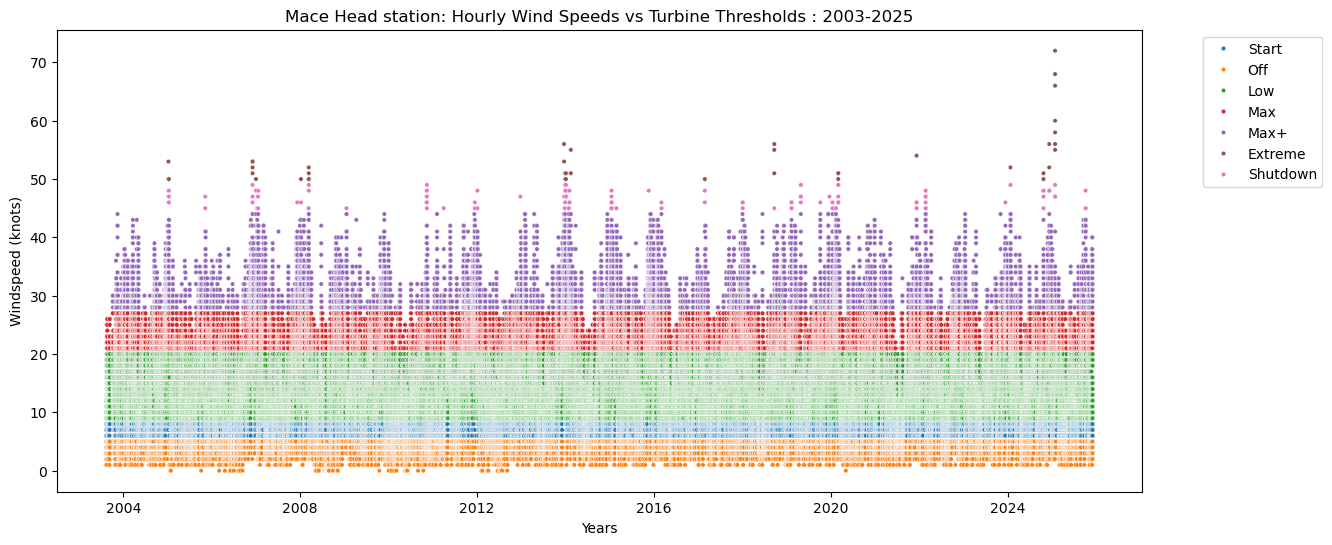

In [65]:
# plot treshold 
plt.figure(figsize=(14,6))
sns.scatterplot(
    data=macehead_df,
    x='date',
    y='wdsp',
    hue='Threshold',
    palette='tab10',
    s=10
)
plt.xlabel('Years')
plt.ylabel('Windspeed (knots)')
plt.title('Mace Head station: Hourly Wind Speeds vs Turbine Thresholds : 2003-2025')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside plot
plt.show()